In [1]:
!pip install emoji
!pip install bs4
!pip install wordcloud  textblob nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:


df = pd.read_csv('spam - spam.csv') #write your own file path
df.head()



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape


(5572, 2)

In [5]:
#check null values
df.isna()


,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [6]:
#find duplicates and drop (inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
#now it should be false
df.duplicated().any()


np.False_

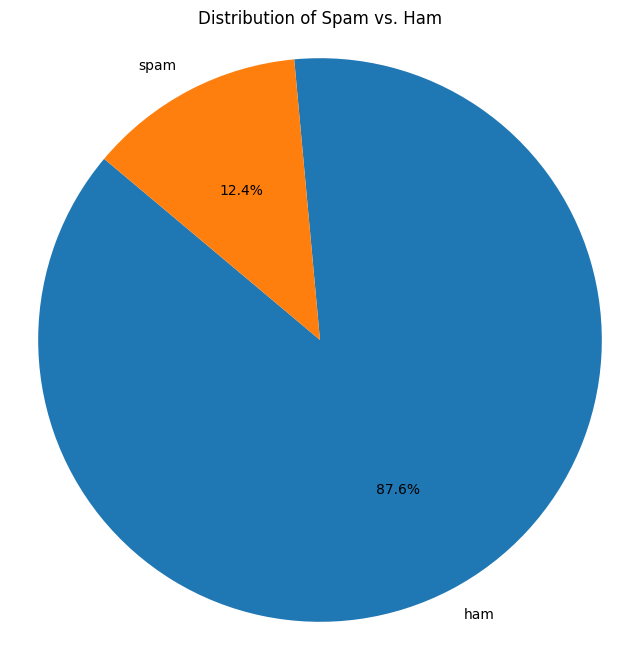

In [8]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

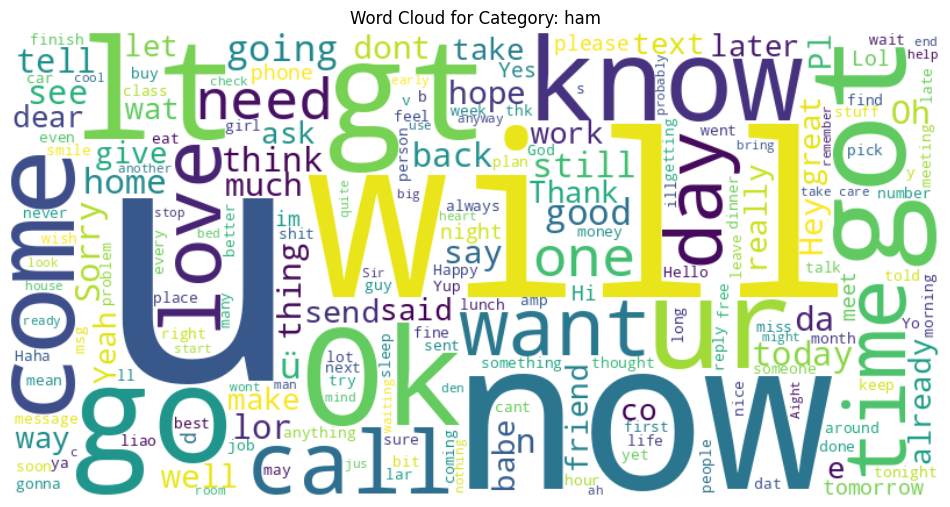

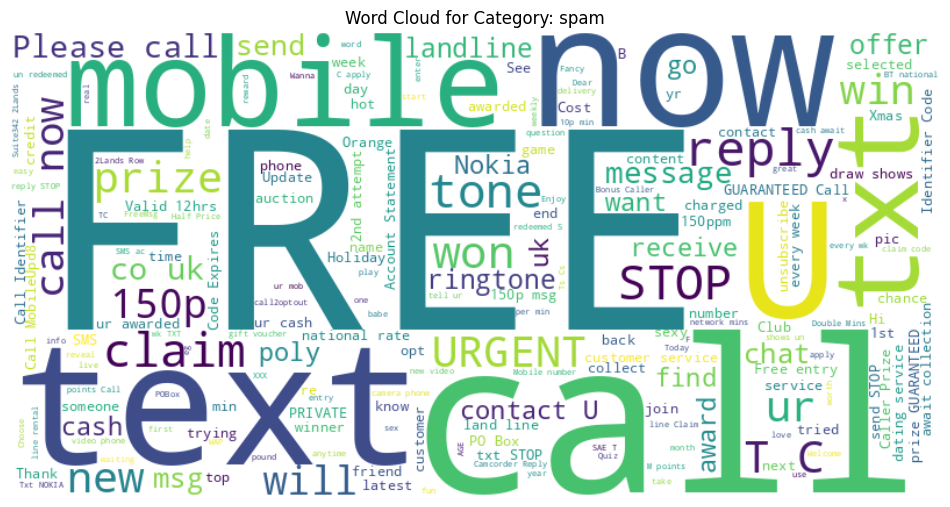

In [9]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()


In [40]:
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

# Perform train-test split after label encoding
X_train, X_test , y_train, y_test = train_test_split(X,df['Category'],test_size = 0.2, random_state = 42)

#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



In [41]:
# Convert 'Text' column to lowercase
df["Message"] = df["Message"].str.lower()

print(df.head())


   Category                                            Message  \
0         0  gountiljurongpointcrazyavailableonlyinbugisngr...   
1         0                                 oklarjokingwifuoni   
2         1  freeentryinawklycomptowinfacupfinaltktsstmayte...   
3         0                  udunsaysoearlyhorucalreadythensay   
4         0    nahidontthinkhegoestousfhelivesaroundherethough   

                                     Message_stemmed  
0  gountiljurongpointcrazyavailableonlyinbugisngr...  
1                                 oklarjokingwifuoni  
2  freeentryinawklycomptowinfacupfinaltktsstmayte...  
3                  udunsaysoearlyhorucalreadythensay  
4    nahidontthinkhegoestousfhelivesaroundherethough  


In [42]:
# Remove extra white spaces from the 'Text' column
df['Message']=df['Message'].apply(lambda x: ' '.join(x.split()))


In [43]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    return BeautifulSoup(str(text),"html.parser").get_text()

# Remove HTML tags from 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)

In [44]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+','',str(text),flags=re.MULTILINE)

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)

In [45]:
def remove_special_characters(text):
    # Remove special characters except alphanumeric and space
    return re.sub(r'[^a-zA-Z0-9\s]', '', str(text))

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)

In [46]:
# Function to remove numeric values from text
def remove_numeric(text):
    return re.sub(r'\d+', '', str(text))

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)

In [47]:
# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    # Remove all characters except letters and numbers
    return re.sub(r'[^a-zA-Z0-9]', '', str(text))

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

In [48]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [49]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = str(text).split()
    replaced_words = [chat_words.get(word.upper(), word) for word in words]
    return ' '.join(replaced_words)

# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)

In [50]:


# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column/
df['Message'] = df['Message'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)


In [52]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
df.head()


,Category,Message,Message_stemmed
0,0,gountiljurongpointcrazyavailableonlyinbugisngr...,gountiljurongpointcrazyavailableonlyinbugisngr...
1,0,oklarjokingwifuoni,oklarjokingwifuoni
2,1,freeentryinawklycomptowinfacupfinaltktsstmayte...,freeentryinawklycomptowinfacupfinaltktsstmayte...
3,0,udunsaysoearlyhorucalreadythensay,udunsaysoearlyhorucalreadythensay
4,0,nahidontthinkhegoestousfhelivesaroundherethough,nahidontthinkhegoestousfhelivesaroundherethough


In [53]:
#Convert text to numbers using bag of words
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']


In [54]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
scaler.fit_transform(X)

array([[-0.01392655, -0.01392655, -0.01392655, ..., -0.01392655,
        -0.01392655, -0.01392655],
       [-0.01392655, -0.01392655, -0.01392655, ..., -0.01392655,
        -0.01392655, -0.01392655],
       [-0.01392655, -0.01392655, -0.01392655, ..., -0.01392655,
        -0.01392655, -0.01392655],
       ...,
       [-0.01392655, -0.01392655, -0.01392655, ..., -0.01392655,
        -0.01392655, -0.01392655],
       [-0.01392655, -0.01392655, -0.01392655, ..., -0.01392655,
        -0.01392655, -0.01392655],
       [-0.01392655, -0.01392655, -0.01392655, ..., -0.01392655,
        -0.01392655, -0.01392655]])

In [55]:
# This cell is no longer needed as the train-test split is done after label encoding
# X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [56]:
y_train

,Category
2598,0
5418,0
99,0
2321,0
2388,0
...,...
4750,0
474,1
3273,0
4022,0


#Solve this problem using Logistic Regression(using numpy from scratch)

In [65]:
import numpy as np

class LogisticRegression:
    def __init__(self, lambda_=0.001):
        self.lambda_ = lambda_
        self.w = None
        self.b = None

    def sigmoid(self, z):
        # Use numerically stable sigmoid
        return np.where(z >= 0,
                        1 / (1 + np.exp(-z)),
                        np.exp(z) / (1 + np.exp(z)))

    def log_loss(self, y_true, y_pred):
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        # Add L2 regularization term
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) \
               + (self.lambda_ / (2 * y_true.size)) * np.sum(self.w ** 2)

    def fit(self, x, y, x_t=None, y_t=None, alpha_init=1.0, beta=0.5, c=1e-4, epochs=1000):
        n_samples, n_features = x.shape
        self.w = np.zeros(n_features)
        self.b = 0.0
        loss = []
        val_loss = []

        for i in range(epochs):
            # Forward pass
            z = np.dot(x, self.w) + self.b
            y_pred = self.sigmoid(z)

            # Gradients with L2 regularization
            dw = (np.dot(x.T, (y_pred - y)) + self.lambda_ * self.w) / n_samples
            db = np.sum(y_pred - y) / n_samples

            # Gradient norm for line search
            grad_norm = np.linalg.norm(dw) ** 2 + db ** 2

            # Backtracking line search
            alpha = alpha_init
            while True:
                new_w = self.w - alpha * dw
                new_b = self.b - alpha * db
                new_pred = self.sigmoid(np.dot(x, new_w) + new_b)
                new_loss = self.log_loss(y, new_pred)
                if new_loss <= self.log_loss(y, y_pred) - c * alpha * grad_norm:
                    break
                alpha *= beta

            # Update parameters
            self.w -= alpha * dw
            self.b -= alpha * db

            # Save losses
            loss.append(self.log_loss(y, self.sigmoid(np.dot(x, self.w) + self.b)))
            if x_t is not None and y_t is not None:
                y_val_pred = self.sigmoid(np.dot(x_t, self.w) + self.b)
                val_loss.append(self.log_loss(y_t, y_val_pred))

            # Debug info
            if i % 100 == 0:
                if x_t is not None:
                    print(f"Epoch {i} | Train Loss: {loss[-1]:.4f} | Val Loss: {val_loss[-1]:.4f}")
                else:
                    print(f"Epoch {i} | Train Loss: {loss[-1]:.4f}")

        return loss, val_loss

    def predict(self, x):
        y_pred = self.sigmoid(np.dot(x, self.w) + self.b)
        return np.where(y_pred >= 0.001, 1, 0)

    def accuracy_score(self, x, y):
        y_pred = self.predict(x)
        return np.mean(y_pred == y) * 100.0


In [61]:
lr = LogisticRegressionScratchMiniBatch(n_iters=500) # Instantiate with the correct class name and set n_iters to 500 as in the plot
loss, val_loss = lr.fit(X_train, y_train, X_test, y_test) # Pass X_test and y_test to fit and capture both returned losses

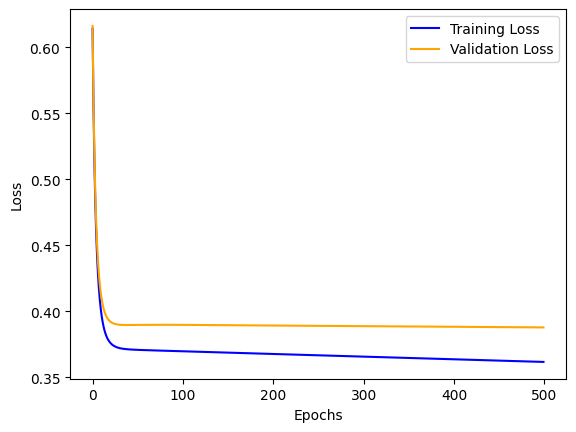

<Figure size 640x480 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt

plt.plot(loss, label='Training Loss',color='b')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('loss_plot_numpy.png')

Confusion Matrix:


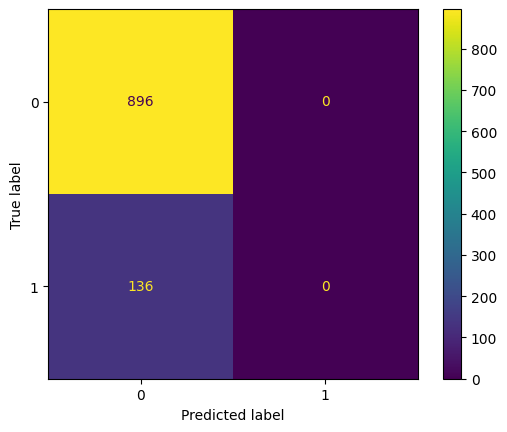

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
y_pred=lr.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.savefig('confusion_matrix_numpy.png')

In [68]:
print(f"Accuracy on Test Dataset from Scratch: {lr.accuracy_score(X_test, y_test):.2f}%")

Accuracy on Test Dataset from Scratch: 86.82%


#Now Use sklearn library to fit the data using logistic regression and compare results

In [69]:
from sklearn.linear_model import LogisticRegression as sklearnlr
model=sklearnlr()
model.fit(X_train,y_train)
print(f"Accuracy on Test Dataset from Sklearn: {model.score(X_test,y_test)*100:.2f}%")

Accuracy on Test Dataset from Sklearn: 87.02%


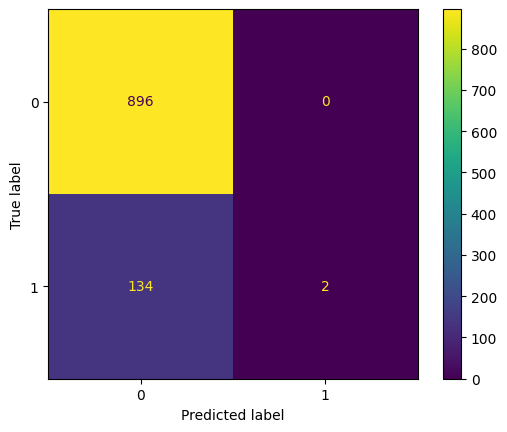

In [70]:
y_pred=model.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.savefig('confusion_matrix_sklearn.png')

In [71]:
print("Finish")

Finish
